In [127]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
#read the data files
train_data = pd.read_csv('viewer_data.csv')
test_data = pd.read_csv('test_data.csv')

In [83]:
train_data.head()

,viewer_id,gender,age,city
0,1918165,Female,39,Dallas
1,27662619,Female,28,New York
2,5493662,Female,53,Detroit
3,14441247,Male,41,New York
4,25595927,Male,53,Seattle


In [84]:
train_data.shape

(417464, 4)

In [85]:
test_data.head()

,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0


In [86]:
test_data.shape

(418026, 9)

In [87]:
#missing data in each colm
train_data.isna().sum()

viewer_id    0
gender       0
age          0
city         0
dtype: int64

In [88]:
#missing data in each colm
test_data.isna().sum()

viewer_id                 0
date                      0
tv_make                   0
tv_size                   0
uhd_capable               0
tv_provider           52720
total_time_watched        0
watched                   0
test                      0
dtype: int64

In [89]:
#starting simple - drop the tv provider rows that has missing values 
#test_data = test_data.dropna()

In [90]:
test_data.shape

(418026, 9)

In [91]:
test_data.isna().sum()

viewer_id                 0
date                      0
tv_make                   0
tv_size                   0
uhd_capable               0
tv_provider           52720
total_time_watched        0
watched                   0
test                      0
dtype: int64

In [92]:
#merging the data 
combined_data = pd.merge(train_data,test_data) #pd.merge uses viewer_id to join the two datasets

In [93]:
combined_data.shape

(417470, 12)

In [94]:
combined_data.head()

,viewer_id,gender,age,city,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,1918165,Female,39,Dallas,2018-01-16,Sony,60,1,Comcast,10.25,0,1
1,27662619,Female,28,New York,2018-01-18,Sony,43,0,Comcast,5.25,0,0
2,5493662,Female,53,Detroit,2018-01-16,Toshiba,60,1,NaN,15.25,0,0
3,14441247,Male,41,New York,2018-01-18,Sony,43,0,Cox,4.00,0,1
4,25595927,Male,53,Seattle,2018-01-19,Sony,60,0,Time Warner Cable,1.00,0,0


In [95]:
#group by city, and compute total users who watched the show
combined_data.groupby('city')['watched'].sum()

city
Atlanta          1230
Boston           1267
Chicago          1672
Dallas           1315
Detroit           899
Houston          1268
Los Angeles      5412
Miami             881
Minneapolis       913
New York         3599
Philadelphia      675
Phoenix          1016
San Francisco    1210
Seattle           487
Tampa             958
Name: watched, dtype: int64

In [140]:
#then compute fraction of people who watched the show per city 
combined_data.groupby('city')['watched'].sum().transform(lambda x: 100* x/x.sum()).sort_values(ascending=False)

city
Los Angeles      23.734760
New York         15.783703
Chicago           7.332690
Dallas            5.767038
Houston           5.560916
Boston            5.556530
Atlanta           5.394264
San Francisco     5.306552
Phoenix           4.455749
Tampa             4.201386
Minneapolis       4.004035
Detroit           3.942637
Miami             3.863696
Philadelphia      2.960267
Seattle           2.135778
Name: watched, dtype: float64

In [149]:
#analyze the experiment
combined_data.groupby(['city','test'])['watched'].sum().transform(lambda x: x/x.sum()).sort_values(ascending=False)

city           test
Los Angeles    0       0.237348
New York       0       0.079291
               1       0.078546
Chicago        1       0.038505
               0       0.034822
Boston         1       0.029033
Houston        1       0.029033
Dallas         1       0.028945
               0       0.028726
Atlanta        1       0.028112
San Francisco  1       0.027454
Houston        0       0.026577
Boston         0       0.026533
Atlanta        0       0.025831
San Francisco  0       0.025612
Philadelphia   1       0.025217
Phoenix        1       0.022630
Tampa          1       0.021972
Phoenix        0       0.021928
Detroit        1       0.021445
Minneapolis    1       0.020919
Miami          1       0.020568
Tampa          0       0.020042
Minneapolis    0       0.019121
Miami          0       0.018069
Detroit        0       0.017981
Seattle        1       0.017849
Philadelphia   0       0.004386
Seattle        0       0.003508
Name: watched, dtype: float64

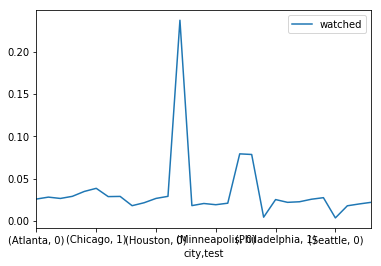

In [105]:
#graphic representation 
combined_data.groupby(['city','test'])['watched'].sum().transform(lambda x: x/x.sum()).plot(legend=True)

In [125]:
#proportion of watched users between test groups
combined_data.groupby('test')['watched'].sum().transform(lambda x: x/x.sum()).sort_values(ascending=False)

test
0    0.589773
1    0.410227
Name: watched, dtype: float64

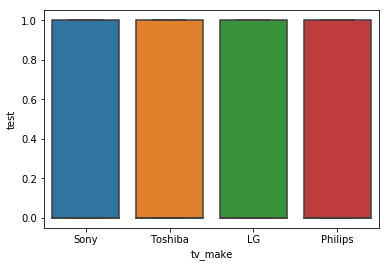

In [131]:
#investigation test x tv_make

sns.boxplot(x='tv_make', y='test', data=combined_data)

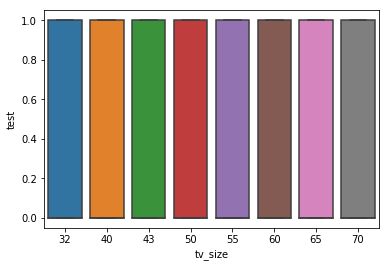

In [132]:
#investigation test x tv_size

sns.boxplot(x='tv_size', y='test', data=combined_data)

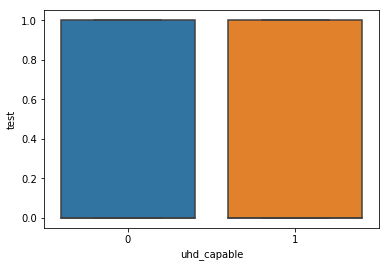

In [135]:
#investigation test x uhd_capable

sns.boxplot(x='uhd_capable', y='test', data=combined_data)

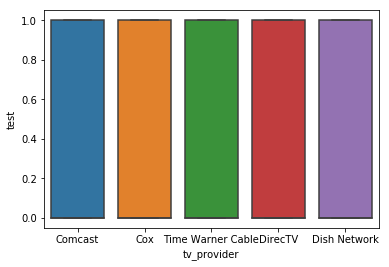

In [129]:
#investigation test x tv_provider
sns.boxplot(x='tv_provider', y='test', data=combined_data)

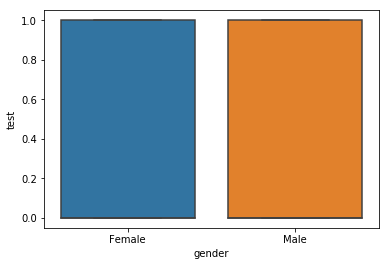

In [130]:
#investigation test x gender

sns.boxplot(x='gender', y='test', data=combined_data)

In [139]:
# number 3

combined_data.groupby(['test','watched'])['total_time_watched'].agg(['sum', 'mean'])

sum       mean
test watched                       
0    0        2002804.75  10.029318
     1         135190.00  10.052796
1    0        1959861.75  10.051965
     1          93636.25  10.010290